In [3]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
%matplotlib inline

In [4]:
def get_sampling_dirs(a_dir, only=''):
    return sorted([filename for filename in glob.glob(join(a_dir,'*/PCAP-03-11_l'))])    

In [5]:
def get_avg_abs_recall(d,eval_type='majority'):
    df = pd.read_csv(join(d,'recall',eval_type,'detection_rate.csv'))
    avg_dt = df[df['Label']=='Macro Average of Attacks']['Rc'].values[0]
    return avg_dt

In [6]:
def extract_sampler_names(dir_names):
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            label = 'Sketch Guided Sampling'
        elif 'RPS' in dir_name:
            label = 'Random Packet Sampling'
        elif 'FFS' in dir_name:
            label = 'Fast Filtered Sampling'
        elif 'SEL' in dir_name:
            label = 'Selective Flow Sampling'
        elif 'without_sampling_l' in dir_name:
            label = 'Without Sampling'

        else:
            print('Investigate plot_comparison',dir_name)
        
        sampler_names.append(label)
    return sampler_names

Fast Filtered Sampling [19.89, 19.89, 19.89, 19.89, 19.88, 19.91]
Random Packet Sampling [20.17, 20.17, 20.17, 20.17, 20.16, 20.16]
Selective Flow Sampling [19.92, 19.92, 19.92, 19.92, 19.92, 19.92]
SketchFlow Sampling [20.93, 20.93, 20.93, 20.93, 20.93, 20.94]
Sketch Guided Sampling [21.93, 21.93, 21.93, 21.93, 21.93, 21.92]


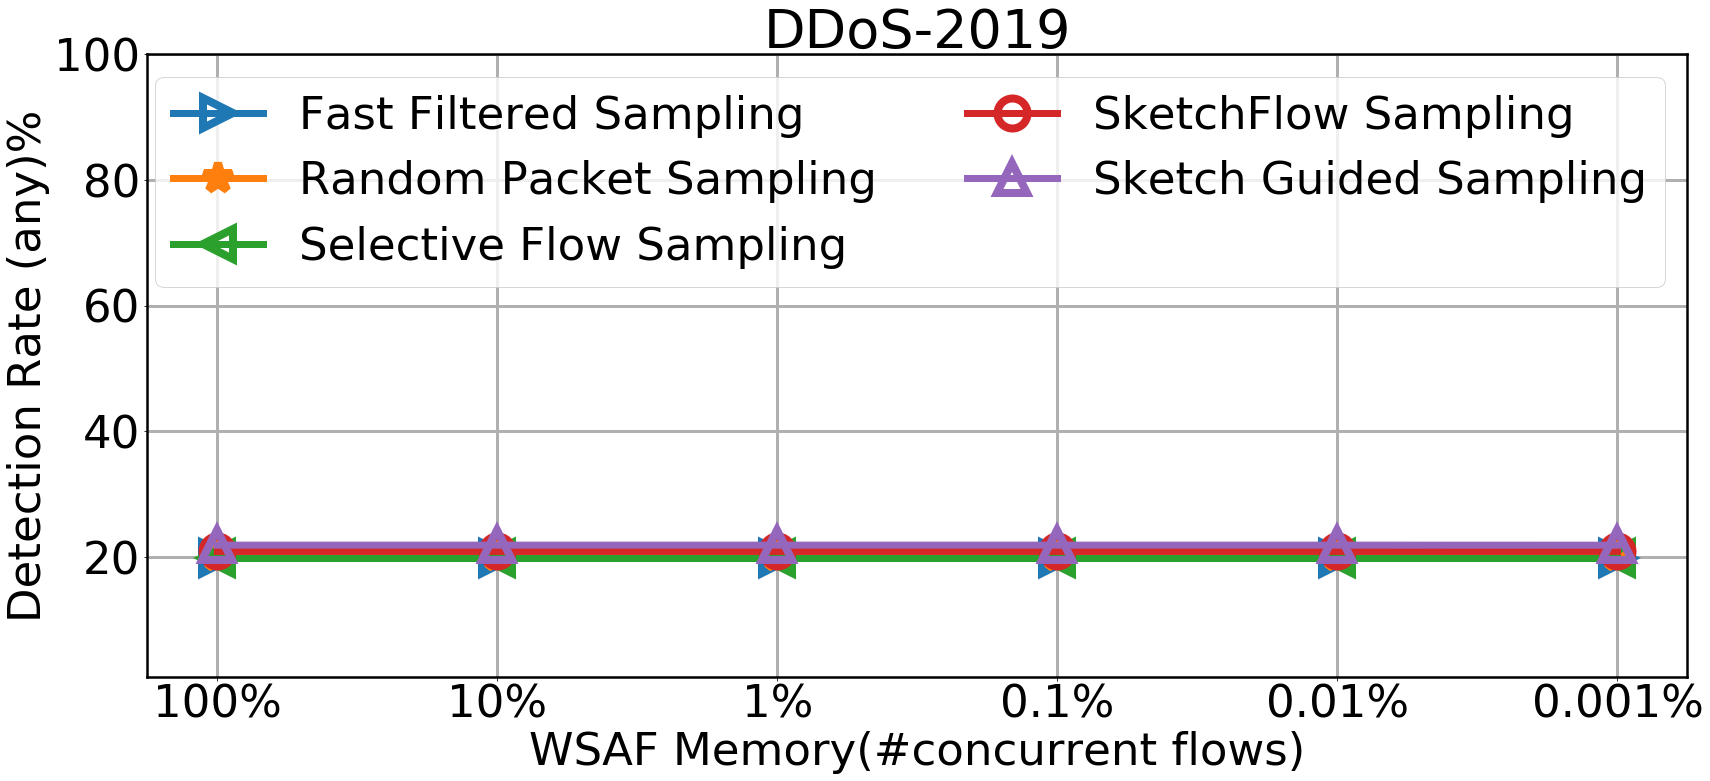

In [7]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]

classifier_fingerprint = 'c_cnn_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    #print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='any') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        recalls[name].append(avg_abs_rcs[i])
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)
plt.title("DDoS-2019")
plt.ylabel('Detection Rate (any)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
ax.set_ylim(1,100)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_cnn_dt_any_50.png', bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling [19.88, 19.88, 19.88, 19.88, 19.86, 19.86]
Random Packet Sampling [20.17, 20.17, 20.17, 20.17, 20.15, 20.14]
Selective Flow Sampling [19.9, 19.9, 19.9, 19.9, 19.9, 19.9]
SketchFlow Sampling [20.92, 20.92, 20.92, 20.92, 20.9, 20.87]
Sketch Guided Sampling [21.93, 21.93, 21.93, 21.93, 21.93, 21.9]


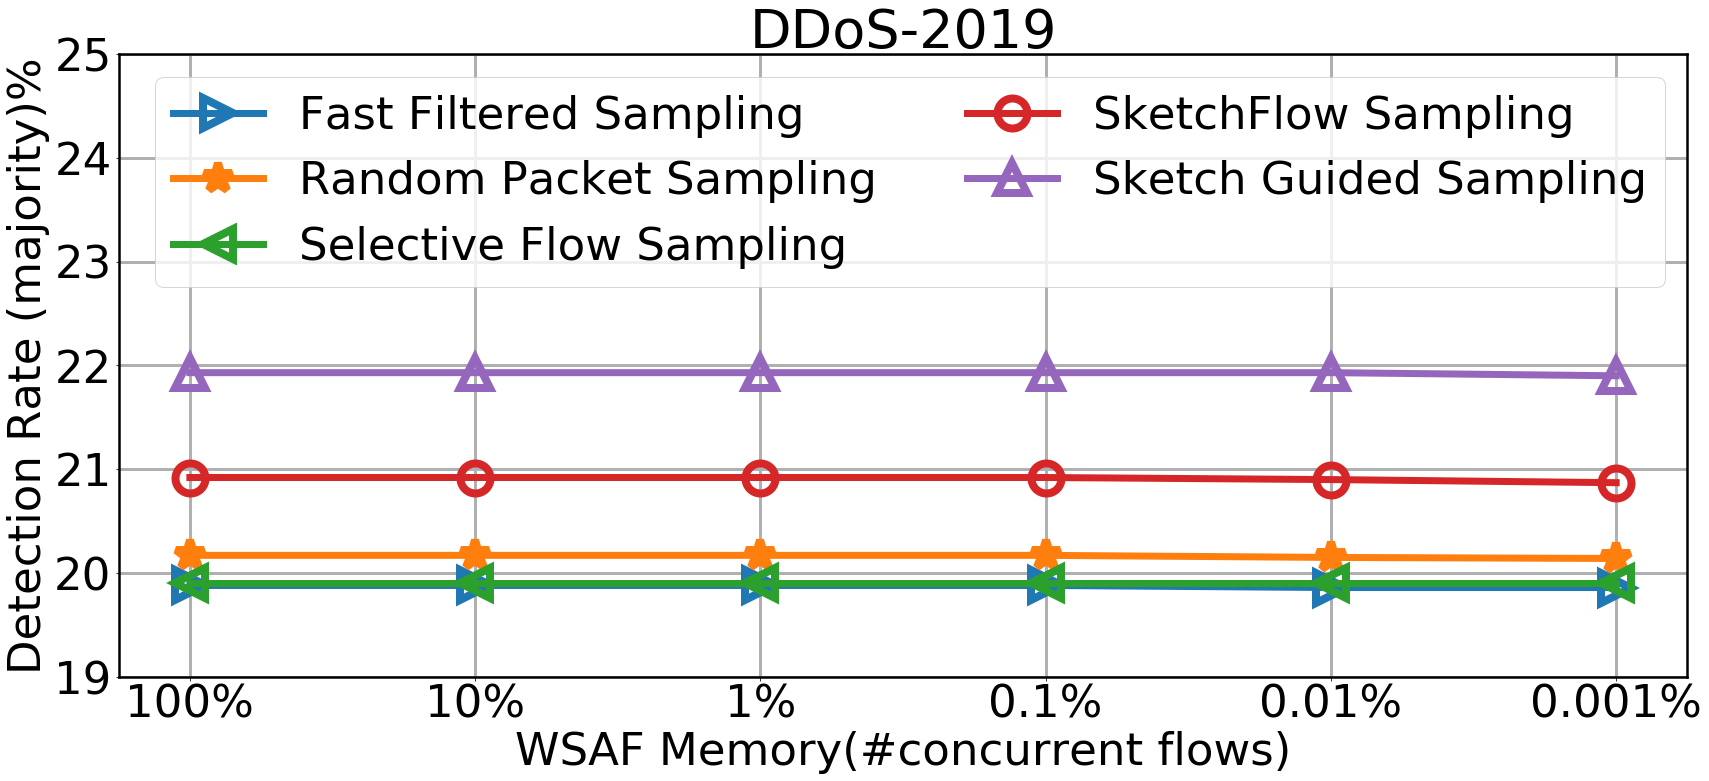

In [8]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]

classifier_fingerprint = 'c_cnn_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='majority') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        recalls[name].append(avg_abs_rcs[i])
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)
plt.title("DDoS-2019")
plt.ylabel('Detection Rate (majority)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
ax.set_ylim(19,25)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_cnn_dt_majority.png', bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling [19.87, 19.87, 19.86, 19.86, 19.84, 19.84]
Random Packet Sampling [20.16, 20.16, 20.15, 20.15, 20.14, 20.12]
Selective Flow Sampling [19.89, 19.89, 19.89, 19.89, 19.89, 19.89]
SketchFlow Sampling [20.91, 20.91, 20.9, 20.9, 20.89, 20.86]
Sketch Guided Sampling [21.93, 21.92, 21.92, 21.92, 21.91, 21.89]


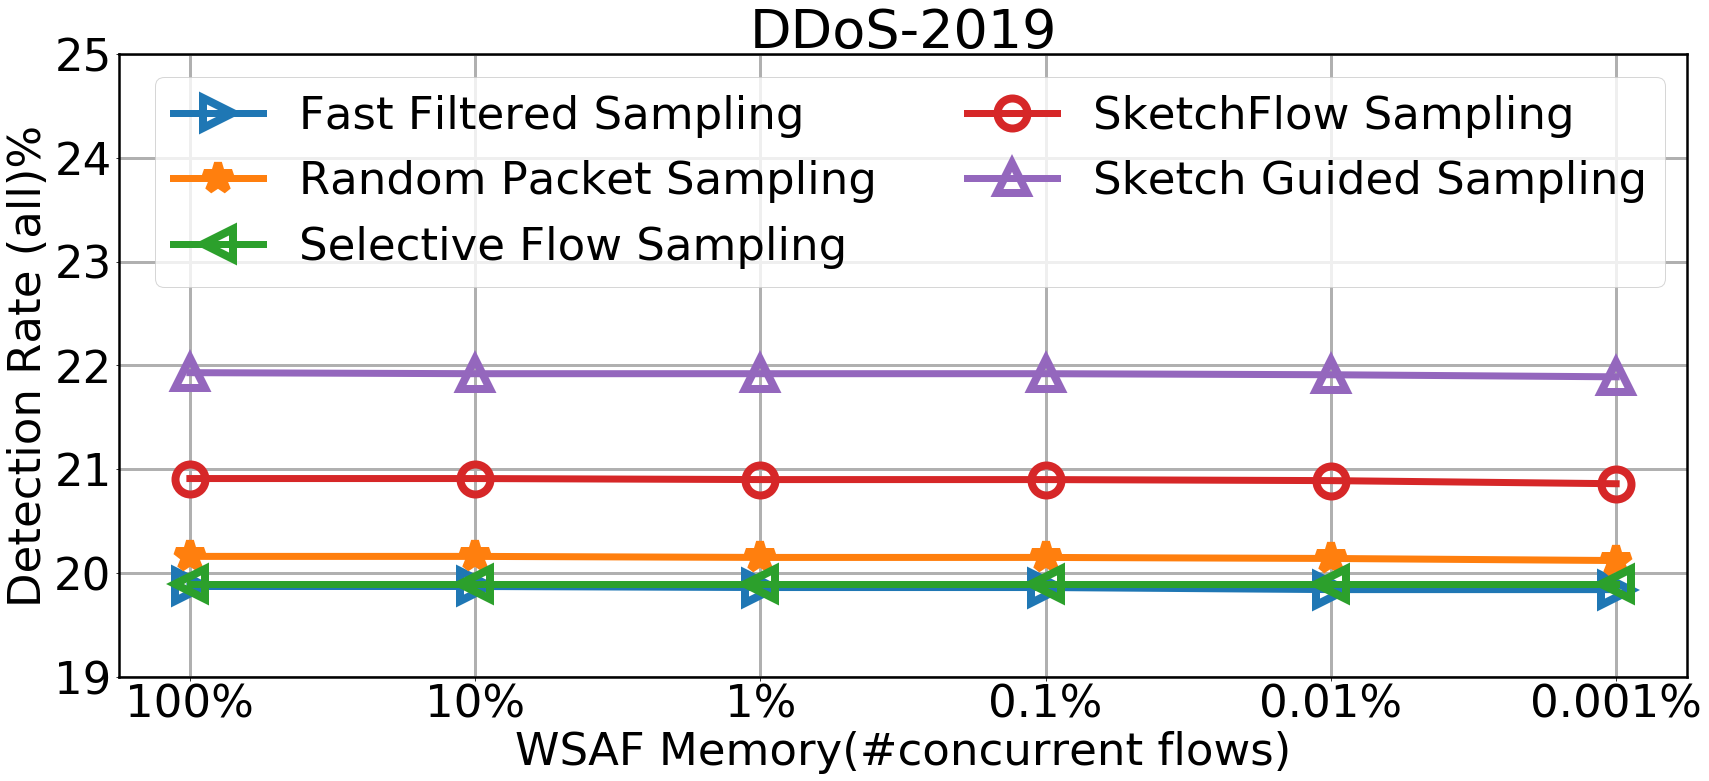

In [9]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]

classifier_fingerprint = 'c_cnn_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='all') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        recalls[name].append(avg_abs_rcs[i])
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)
plt.title("DDoS-2019")
plt.ylabel('Detection Rate (all)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
ax.set_ylim(19,25)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_cnn_dt_all.png', bbox_inches='tight',dpi=200)
plt.show()

['/data/juma/data/ddos/CSVs_r_1.0/SR_10/FFS_(8,16,4)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/RPS_SI_10/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/SEL_(230,1,1)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/SFS_SI_9.77/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/SGS_e_0.0028/PCAP-03-11_l']
['/data/juma/data/ddos/CSVs_r_0.1/SR_10/FFS_(8,16,4)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/RPS_SI_10/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/SEL_(230,1,1)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/SFS_SI_9.77/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/SGS_e_0.0028/PCAP-03-11_l']
['/data/juma/data/ddos/CSVs_r_0.01/SR_10/FFS_(8,16,4)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.01/SR_10/RPS_SI_10/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.01/SR_10/SEL_(230,1,1)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.01/SR_10/SFS_SI_9.77/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.01/SR_10/SGS_e_0.0028/PCAP-03-11_

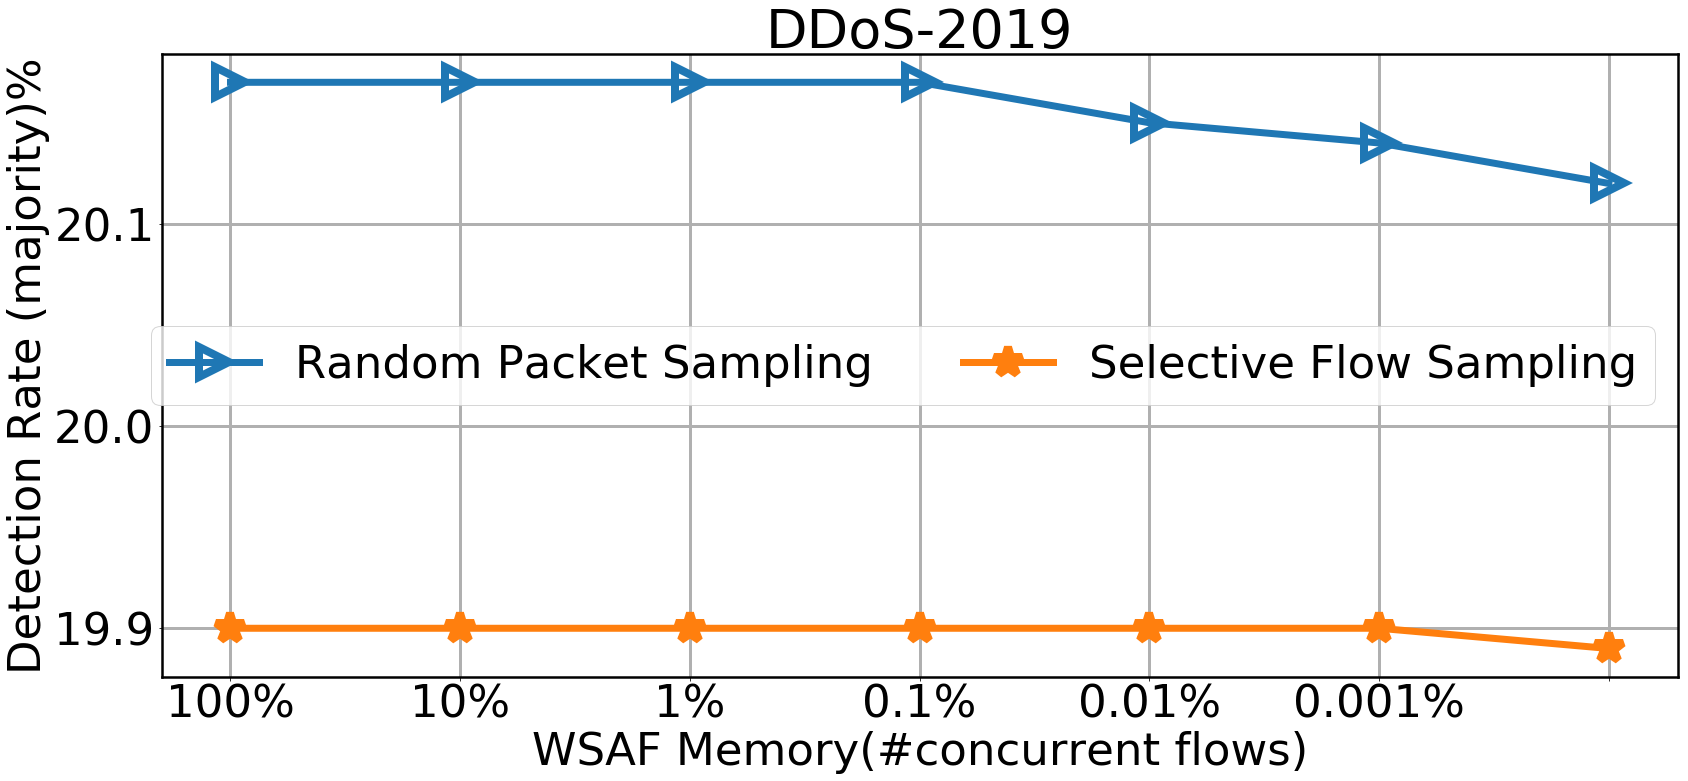

In [13]:
SR ='SR_10'
roots = ['/data/juma/data/ddos/CSVs_r_1.0/'+SR,
         '/data/juma/data/ddos/CSVs_r_0.1/'+SR,
         '/data/juma/data/ddos/CSVs_r_0.01/'+SR,
        '/data/juma/data/ddos/CSVs_r_0.001/'+SR,
        '/data/juma/data/ddos/CSVs_r_0.0001/'+SR,
        '/data/juma/data/ddos/CSVs_r_1e-05/'+SR,
        '/data/juma/data/ddos/CSVs_r_1e-06/'+SR
        ]

classifier_fingerprint = 'c_cnn_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
#classifier_fingerprint = 'r_1_c_cnn_k_5_mem_constrained_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'

recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='majority') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        recalls[name].append(avg_abs_rcs[i])
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)
plt.title("DDoS-2019")
plt.ylabel('Detection Rate (majority)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
#ax.set_ylim(19,25)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_cnn_dt_majority_{}.png'.format(SR), bbox_inches='tight',dpi=100)
plt.show()

No handles with labels found to put in legend.


[]
[]
[]
[]
[]
[]


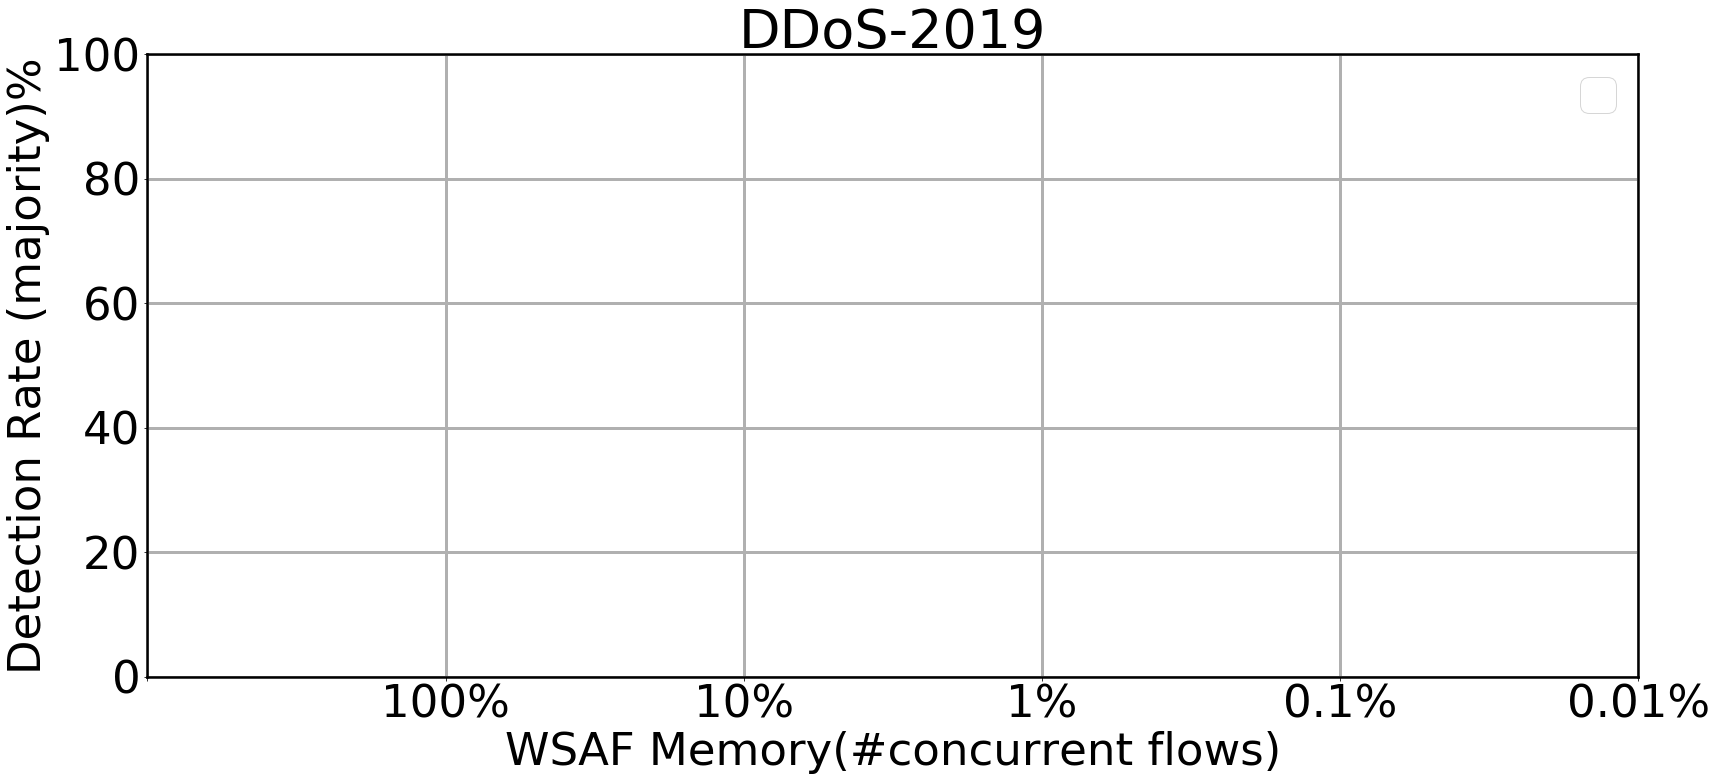

In [11]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_50/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_50/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_50/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_50/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_50/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_50/'
        ]

classifier_fingerprint = 'c_cnn_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
#classifier_fingerprint = 'r_1_c_cnn_k_5_mem_constrained_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'

recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='all') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        recalls[name].append(avg_abs_rcs[i])
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)
plt.title("DDoS-2019")
plt.ylabel('Detection Rate (majority)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
ax.set_ylim(0,100)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_cnn_dt_all_50.png', bbox_inches='tight',dpi=100)
plt.show()